In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

In [2]:
df = pd.read_excel(r"Z:\Daria\IL-22 paper\3_Immunity revised paper\JJ TCGA\New BRCA Run 180122\BRCA_HER2+_Main.xlsx", sheet_name = 0, index_col = 0)

In [3]:
df

,samples,IL22RA1,IL22RA2,IL10RB,PVR,ER_Status_nature2012,PR_Status_nature2012,HER2_Final_Status_nature2012,AJCC_Stage_nature2012,OS_event_nature2012,OS_Time_nature2012,histological_type,sample_type,Cluster
sample,,,,,,,,,,,,,,
TCGA-BH-A0C7-01,TCGA-BH-A0C7-01,6.5820,2.1330,9.234,8.937,Positive,Negative,Positive,Stage II,0,1305,Infiltrating Ductal Carcinoma,Primary Tumor,0
TCGA-C8-A138-01,TCGA-C8-A138-01,6.2860,2.2000,9.944,8.739,Positive,Negative,Positive,Stage III,0,7,Infiltrating Ductal Carcinoma,Primary Tumor,1
TCGA-E2-A14Y-01,TCGA-E2-A14Y-01,5.6950,4.2070,9.354,9.864,Positive,Positive,Positive,Stage II,0,688,Infiltrating Ductal Carcinoma,Primary Tumor,0
TCGA-BH-A0EE-01,TCGA-BH-A0EE-01,5.3040,5.3750,10.290,7.858,Negative,Negative,Positive,Stage II,0,943,Infiltrating Ductal Carcinoma,Primary Tumor,1
TCGA-A8-A08G-01,TCGA-A8-A08G-01,5.1150,0.9034,9.662,8.913,Positive,Positive,Positive,Stage II,0,606,Infiltrating Ductal Carcinoma,Primary Tumor,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-AQ-A04L-01,TCGA-AQ-A04L-01,0.4992,5.2870,9.495,8.592,Positive,Negative,Positive,Stage II,0,3344,Infiltrating Ductal Carcinoma,Primary Tumor,1
TCGA-A8-A09G-01,TCGA-A8-A09G-01,0.3853,2.7690,8.692,7.534,Positive,Negative,Positive,Stage III,0,0,Infiltrating Ductal Carcinoma,Primary Tumor,2
TCGA-BH-A1F2-01,TCGA-BH-A1F2-01,0.0000,2.3150,9.500,7.168,Positive,Positive,Positive,Stage III,1,959,Infiltrating Ductal Carcinoma,Primary Tumor,2


In [4]:
df_ls = df.loc[(df["AJCC_Stage_nature2012"]== "Stage I")|(df["AJCC_Stage_nature2012"]== "Stage II")] #low stages

In [5]:
df_hs = df.loc[(df["AJCC_Stage_nature2012"]== "Stage III")|(df["AJCC_Stage_nature2012"]== "Stage IV")] #advanced stages

In [6]:
df_hs["AJCC_Stage_nature2012"].value_counts()

Stage III    30
Stage IV      1
Name: AJCC_Stage_nature2012, dtype: int64

In [7]:
df_ls["AJCC_Stage_nature2012"].value_counts()

Stage II    70
Stage I      7
Name: AJCC_Stage_nature2012, dtype: int64

sample
TCGA-BH-A0C7-01     True
TCGA-C8-A138-01    False
TCGA-E2-A14Y-01     True
TCGA-BH-A0EE-01     True
TCGA-A8-A08G-01     True
                   ...  
TCGA-AQ-A04L-01     True
TCGA-A8-A09G-01    False
TCGA-BH-A1F2-01    False
TCGA-A8-A07P-01     True
TCGA-A8-A07B-01     True
Name: AJCC_Stage_nature2012, Length: 110, dtype: bool

In [43]:
T = df["OS_Time_nature2012"]
E = df["OS_event_nature2012"]
kmf = KaplanMeierFitter()

ls = ((df["AJCC_Stage_nature2012"]== "Stage I")|(df["AJCC_Stage_nature2012"]== "Stage II"))
hs = ((df["AJCC_Stage_nature2012"]== "Stage III")|(df["AJCC_Stage_nature2012"]== "Stage IV"))

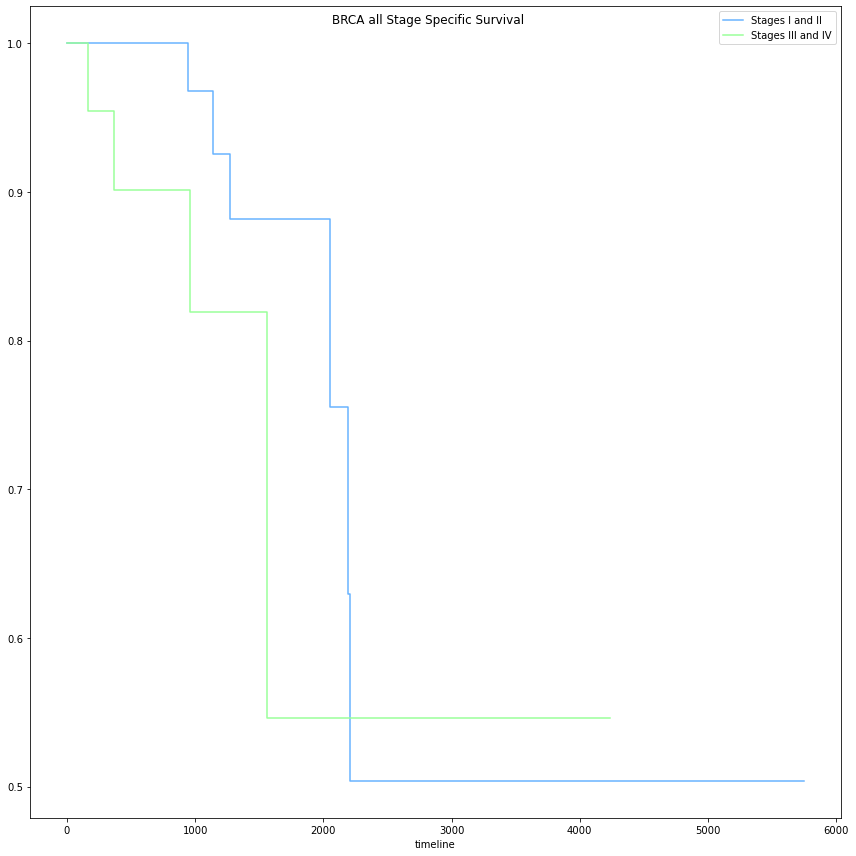

In [44]:
#plotting all cluster PFI times w/o confidence intervals for visibility

fig, (ax) = plt.subplots(nrows = 1, ncols = 1, sharex = True, figsize = (12, 12))

kmf0= KaplanMeierFitter()
ax = kmf0.fit(T[ls], E[ls], label="Stages I and II").plot(ax=ax, figsize = (12, 12), ci_show = False, color = "#66b3ff")

kmf1= KaplanMeierFitter()
ax = kmf1.fit(T[hs], E[hs], label="Stages III and IV").plot(ax=ax, figsize = (12, 12), ci_show = False, color = "#99ff99")

#kmf2= KaplanMeierFitter()
#ax = kmf2.fit(T[cl2], E[cl2], label="Cluster 2").plot(ax=ax, figsize = (12, 12), ci_show = False, color = "#ffcc99")
fig.suptitle("BRCA all Stage Specific Survival")
#plt.savefig(fname = "LUAD_PFI_clusters.svg", format = "svg")
plt.tight_layout()

In [45]:
# logrank test of cluster 1 vs cluster 2
from lifelines.statistics import logrank_test

results = logrank_test(T[ls], T[hs], E[ls], E[hs], alpha=.95)# logrank test of low stages vs high stages

results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           2.04 0.15      2.71

In [47]:
T = df["OS_Time_nature2012"]
E = df["OS_event_nature2012"]
kmf = KaplanMeierFitter()

ls_0 = (((df["AJCC_Stage_nature2012"]== "Stage I")|(df["AJCC_Stage_nature2012"]== "Stage II"))&(df["Cluster"]==0))
hs_0 = ((df["AJCC_Stage_nature2012"]== "Stage III")|(df["AJCC_Stage_nature2012"]== "Stage IV")&(df["Cluster"]==0))

ls_1 = (((df["AJCC_Stage_nature2012"]== "Stage I")|(df["AJCC_Stage_nature2012"]== "Stage II"))&(df["Cluster"]==1))
hs_1 = (((df["AJCC_Stage_nature2012"]== "Stage III")|(df["AJCC_Stage_nature2012"]== "Stage IV"))&(df["Cluster"]==1))

ls_2 = (((df["AJCC_Stage_nature2012"]== "Stage I")|(df["AJCC_Stage_nature2012"]== "Stage II"))&(df["Cluster"]==2))
hs_2 = (((df["AJCC_Stage_nature2012"]== "Stage III")|(df["AJCC_Stage_nature2012"]== "Stage IV"))&(df["Cluster"]==2))

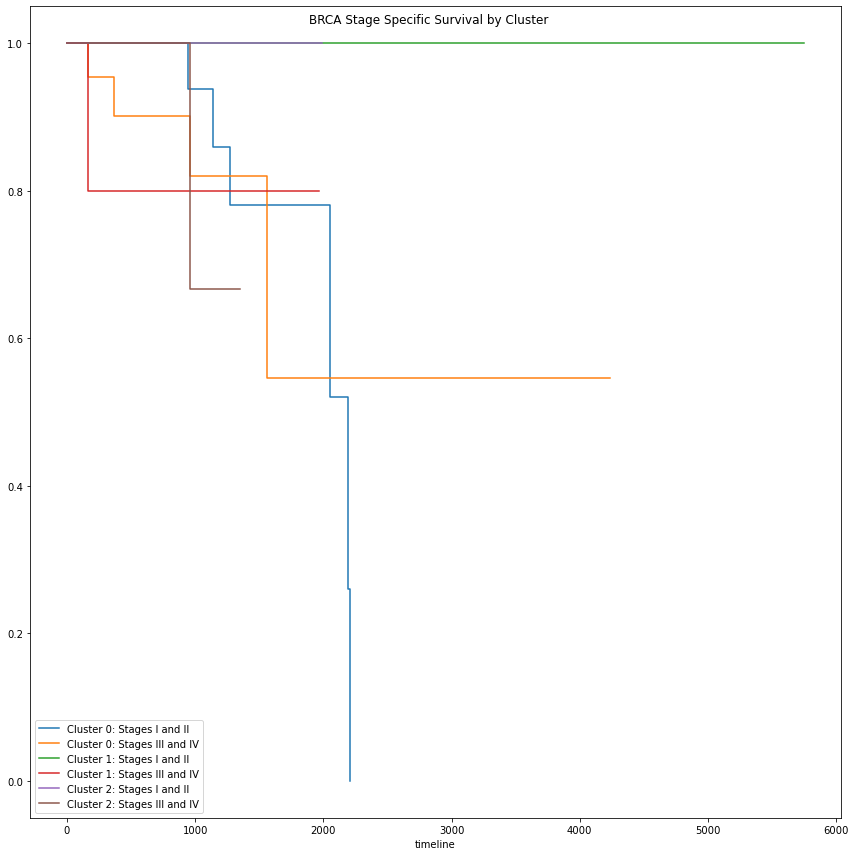

In [49]:
#plotting all cluster times w/o confidence intervals for visibility

fig, (ax) = plt.subplots(nrows = 1, ncols = 1, sharex = True, figsize = (12, 12))

kmf0= KaplanMeierFitter()
ax = kmf0.fit(T[ls_0], E[ls_0], label="Cluster 0: Stages I and II").plot(ax=ax, figsize = (12, 12), ci_show = False)

kmf1= KaplanMeierFitter()
ax = kmf1.fit(T[hs_0], E[hs_0], label="Cluster 0: Stages III and IV").plot(ax=ax, figsize = (12, 12), ci_show = False)

kmf2= KaplanMeierFitter()
ax = kmf2.fit(T[ls_1], E[ls_1], label="Cluster 1: Stages I and II").plot(ax=ax, figsize = (12, 12), ci_show = False)

kmf3= KaplanMeierFitter()
ax = kmf3.fit(T[hs_1], E[hs_1], label="Cluster 1: Stages III and IV").plot(ax=ax, figsize = (12, 12), ci_show = False)

kmf4= KaplanMeierFitter()
ax = kmf4.fit(T[ls_2], E[ls_2], label="Cluster 2: Stages I and II").plot(ax=ax, figsize = (12, 12), ci_show = False)

kmf5= KaplanMeierFitter()
ax = kmf5.fit(T[hs_2], E[hs_2], label="Cluster 2: Stages III and IV").plot(ax=ax, figsize = (12, 12), ci_show = False)

fig.suptitle("BRCA Stage Specific Survival by Cluster")
plt.savefig(fname = "BRCA_Stage_spec_surv_clusters.svg", format = "svg")
plt.tight_layout()

In [50]:
results_ls0_v_hs0 = logrank_test(T[ls_0], T[hs_0], E[ls_0], E[hs_0], alpha=.95)
results_ls1_v_hs1 = logrank_test(T[ls_1], T[hs_1], E[ls_1], E[hs_1], alpha=.95)
results_ls2_v_hs2 = logrank_test(T[ls_2], T[hs_2], E[ls_2], E[hs_2], alpha=.95)

results_ls0_v_ls1 = logrank_test(T[ls_0], T[ls_1], E[ls_0], E[ls_1], alpha=.95)
results_ls0_v_ls2 = logrank_test(T[ls_0], T[ls_2], E[ls_0], E[ls_2], alpha=.95)
results_ls1_v_ls2 = logrank_test(T[ls_1], T[ls_2], E[ls_1], E[ls_2], alpha=.95)

results_hs0_v_hs1 = logrank_test(T[hs_0], T[hs_1], E[hs_0], E[hs_1], alpha=.95)
results_hs0_v_hs2 = logrank_test(T[hs_0], T[hs_2], E[hs_0], E[hs_2], alpha=.95)
results_hs1_v_hs2 = logrank_test(T[hs_1], T[hs_2], E[hs_1], E[hs_2], alpha=.95)

results_ls0_v_hs1 = logrank_test(T[ls_0], T[hs_1], E[ls_0], E[hs_1], alpha=.95)
results_ls0_v_hs2 = logrank_test(T[ls_0], T[hs_2], E[ls_0], E[hs_2], alpha=.95)

results_ls1_v_hs0 = logrank_test(T[ls_1], T[hs_0], E[ls_1], E[hs_0], alpha=.95)
results_ls1_v_hs2 = logrank_test(T[ls_1], T[hs_2], E[ls_1], E[hs_2], alpha=.95)

results_ls2_v_hs0 = logrank_test(T[ls_2], T[hs_0], E[ls_2], E[hs_0], alpha=.95)
results_ls2_v_hs1 = logrank_test(T[ls_2], T[hs_1], E[ls_2], E[hs_1], alpha=.95)

In [51]:
results_ls0_v_hs0.print_summary()
results_ls1_v_hs1.print_summary() 
results_ls2_v_hs2.print_summary() 

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.02 0.90      0.16

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           3.20 0.07      3.76

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.33 0.25      2.01

In [65]:
results_ls0_v_ls1.print_summary() 
results_ls0_v_ls2.print_summary() 
results_ls1_v_ls2.print_summary() 

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
           8.00 <0.005      7.74

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.60 0.44      1.19

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.00 1.00     -0.00

In [66]:
results_hs0_v_hs1.print_summary() 
results_hs0_v_hs2.print_summary() 
results_hs1_v_hs2.print_summary() 

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.02 0.89      0.17

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.05 0.83      0.27

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.14 0.71      0.50

In [54]:
results_ls0_v_hs1.print_summary()
results_ls0_v_hs2.print_summary()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.17 0.28      1.84

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.43 0.51      0.96

In [55]:
results_ls1_v_hs0.print_summary()
results_ls1_v_hs2.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.30 0.04      4.71

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           3.33 0.07      3.88

In [56]:
results_ls2_v_hs0.print_summary()
results_ls2_v_hs1.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           2.05 0.15      2.72

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           2.60 0.11      3.23

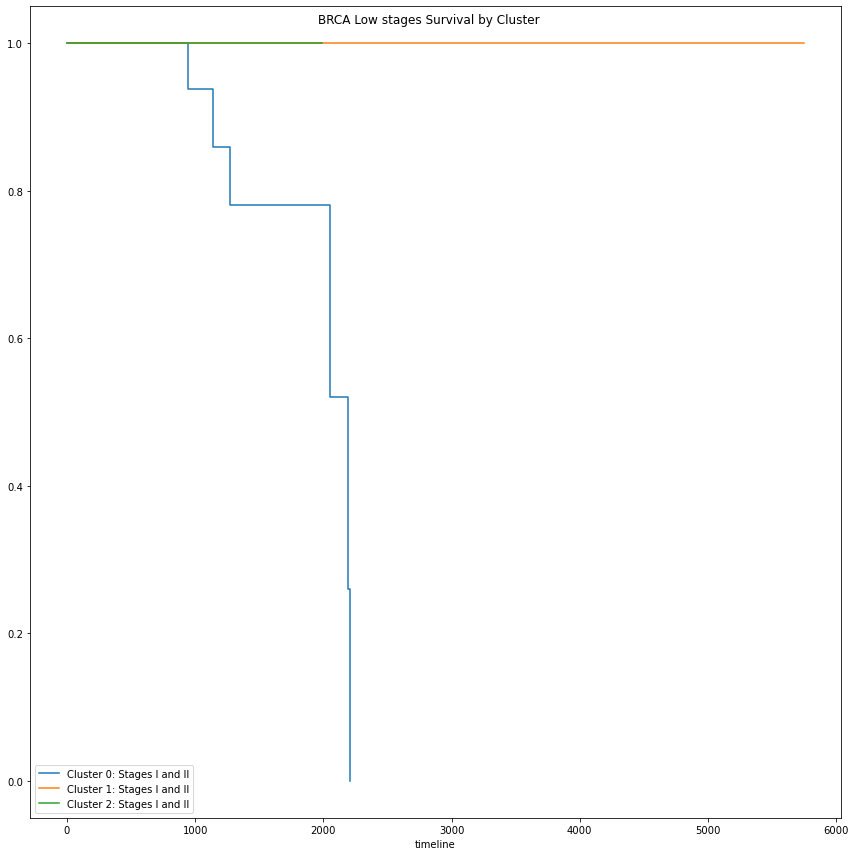

In [64]:
#plotting all cluster times w/o confidence intervals for visibility

fig, (ax) = plt.subplots(nrows = 1, ncols = 1, sharex = True, figsize = (12, 12))

kmf0= KaplanMeierFitter()
ax = kmf0.fit(T[ls_0], E[ls_0], label="Cluster 0: Stages I and II").plot(ax=ax, figsize = (12, 12), ci_show = False)



kmf2= KaplanMeierFitter()
ax = kmf2.fit(T[ls_1], E[ls_1], label="Cluster 1: Stages I and II").plot(ax=ax, figsize = (12, 12), ci_show = False)



kmf4= KaplanMeierFitter()
ax = kmf4.fit(T[ls_2], E[ls_2], label="Cluster 2: Stages I and II").plot(ax=ax, figsize = (12, 12), ci_show = False)


fig.suptitle("BRCA Low stages Survival by Cluster")
plt.savefig(fname = "BRCA_low_Stage_spec_surv_clusters.svg", format = "svg")
plt.tight_layout()

In [62]:
results_ls0_v_ls1 = logrank_test(T[ls_0], T[ls_1], E[ls_0], E[ls_1], alpha=.95)
results_ls0_v_ls1.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
           8.00 <0.005      7.74

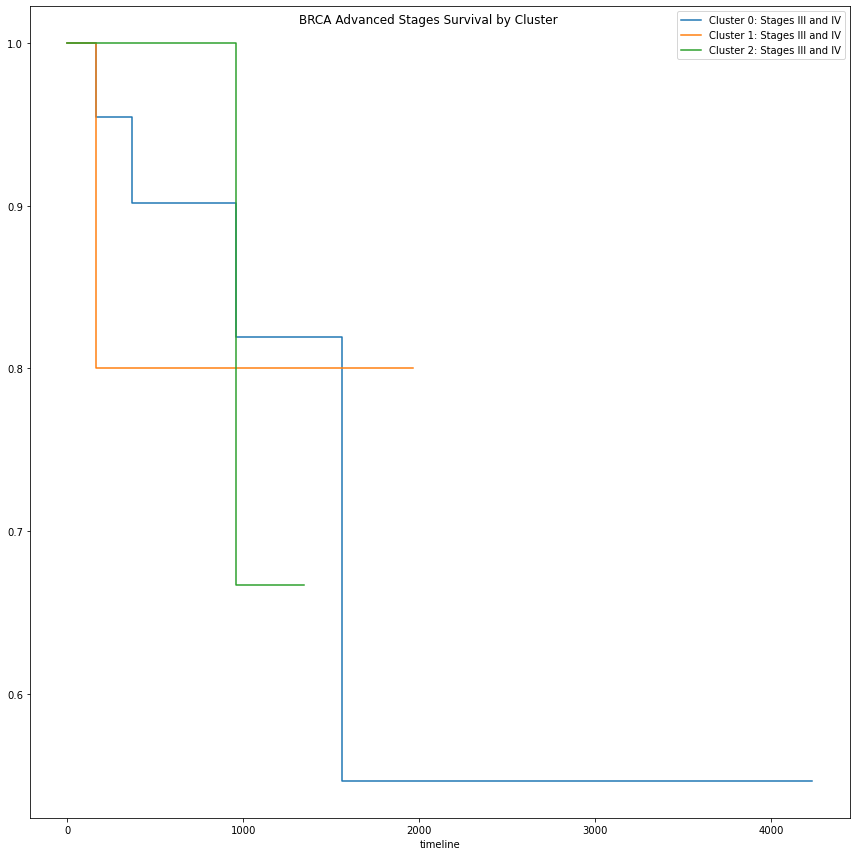

In [63]:
#plotting all cluster times w/o confidence intervals for visibility

fig, (ax) = plt.subplots(nrows = 1, ncols = 1, sharex = True, figsize = (12, 12))



kmf1= KaplanMeierFitter()
ax = kmf1.fit(T[hs_0], E[hs_0], label="Cluster 0: Stages III and IV").plot(ax=ax, figsize = (12, 12), ci_show = False)

kmf3= KaplanMeierFitter()
ax = kmf3.fit(T[hs_1], E[hs_1], label="Cluster 1: Stages III and IV").plot(ax=ax, figsize = (12, 12), ci_show = False)



kmf5= KaplanMeierFitter()
ax = kmf5.fit(T[hs_2], E[hs_2], label="Cluster 2: Stages III and IV").plot(ax=ax, figsize = (12, 12), ci_show = False)

fig.suptitle("BRCA Advanced Stages Survival by Cluster")
plt.savefig(fname = "BRCA_adv_Stage_spec_surv_clusters.svg", format = "svg")
plt.tight_layout()